In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error

#from sklearn.utils.validation import check_is_fitted

### Project 3 - Housing in Argentina

- In project 1 and 2, you learned data wrangling and visualization skills while examining the real estate market in Mexico and Brazil. >> Descriptive
- In this project, you'll build on those skills and 
    - move from descriptive to predictive data science. 
    - you need to create a machine learning model that predicts apartment prices in Buenos Aires, Argentina.

**Problem**

Suppose your `client` wants; 
- a model that can predict the price of apartments in the city of Buenos Aires(`Capital Federal`) — with a focus on apartments that cost less than $500,000 USD.

### 3.1. Predicting Price with Size

### Prepare Data

#### Import

In [4]:
df = pd.read_csv("C:/Users/Tsegi/Desktop/AAC_SCHOOL/DSProject/buenos-aires/buenos-aires-real-estate-1.csv")

In [5]:
df.shape

(8606, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8606 entries, 0 to 8605
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   8606 non-null   object 
 1   property_type               8606 non-null   object 
 2   place_with_parent_names     8606 non-null   object 
 3   lat-lon                     6936 non-null   object 
 4   price                       7590 non-null   float64
 5   currency                    7590 non-null   object 
 6   price_aprox_local_currency  7590 non-null   float64
 7   price_aprox_usd             7590 non-null   float64
 8   surface_total_in_m2         5946 non-null   float64
 9   surface_covered_in_m2       7268 non-null   float64
 10  price_usd_per_m2            4895 non-null   float64
 11  price_per_m2                6520 non-null   float64
 12  floor                       1259 non-null   float64
 13  rooms                       4752 

In [7]:
df.head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Argentina|Capital Federal|Villa Crespo|,"-34.6047834183,-58.4586812499",180000.0,USD,2729232.0,180000.0,120.0,110.0,1500.000000,1636.363636,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
1,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,NaN,250000.0,USD,3790600.0,250000.0,117.0,120.0,2136.752137,2083.333333,NaN,4.0,NaN,http://ramos-mejia.properati.com.ar/s7pd_venta...
2,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,"-34.6497002,-58.658073",410000.0,USD,6216584.0,410000.0,410.0,220.0,1000.000000,1863.636364,NaN,NaN,NaN,http://castelar-moron.properati.com.ar/11vgn_v...
3,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,"-34.5957086,-58.5669503",180000.0,USD,2729232.0,180000.0,200.0,135.0,900.000000,1333.333333,NaN,5.0,NaN,http://tres-de-febrero.properati.com.ar/7f7u_v...
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...


Subsetting capital Federal

In [8]:
CapFed=df["place_with_parent_names"].str.contains("Capital Federal","Bs.As.")
df[CapFed].head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Argentina|Capital Federal|Villa Crespo|,"-34.6047834183,-58.4586812499",180000.0,USD,2729232.0,180000.0,120.0,110.0,1500.000000,1636.363636,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
11,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6050060697,-58.4001162302",60000.0,USD,909744.0,60000.0,28.0,28.0,2142.857143,2142.857143,NaN,1.0,NaN,http://once.properati.com.ar/zz0q_venta_depart...
18,sell,apartment,|Argentina|Capital Federal|Belgrano|,"-34.5646269,-58.4412741",600000.0,USD,9097440.0,600000.0,220.0,NaN,2727.272727,NaN,NaN,5.0,NaN,http://belgrano.properati.com.ar/jvge_venta_de...


Subsetting Apartment

In [9]:
apt=df["property_type"]=="apartment"
df[apt].head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Argentina|Capital Federal|Villa Crespo|,"-34.6047834183,-58.4586812499",180000.0,USD,2729232.0,180000.0,120.0,110.0,1500.000000,1636.363636,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
6,sell,apartment,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|,"-34.6558611,-58.6167212",55000.0,USD,833932.0,55000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://moron-bs-as-g-b-a-zona-oeste.properati....
8,sell,apartment,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,NaN,200000.0,USD,3032480.0,200000.0,61.0,48.0,3278.688525,4166.666667,NaN,2.0,3400.0,http://nordelta.properati.com.ar/vwbs_alquiler...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...


Subsetting price

In [10]:
priceusd=df["price_aprox_usd"]<500000
df[priceusd].head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Argentina|Capital Federal|Villa Crespo|,"-34.6047834183,-58.4586812499",180000.0,USD,2729232.0,180000.0,120.0,110.0,1500.000000,1636.363636,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
1,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,NaN,250000.0,USD,3790600.0,250000.0,117.0,120.0,2136.752137,2083.333333,NaN,4.0,NaN,http://ramos-mejia.properati.com.ar/s7pd_venta...
2,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,"-34.6497002,-58.658073",410000.0,USD,6216584.0,410000.0,410.0,220.0,1000.000000,1863.636364,NaN,NaN,NaN,http://castelar-moron.properati.com.ar/11vgn_v...
3,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,"-34.5957086,-58.5669503",180000.0,USD,2729232.0,180000.0,200.0,135.0,900.000000,1333.333333,NaN,5.0,NaN,http://tres-de-febrero.properati.com.ar/7f7u_v...
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...


In [13]:
df.shape

(1829, 16)

In [ ]:
df=df[CapFed & apt & priceusd]
df.shape

#### Explore

- We know that property size(Area) is an important factor in determining price.
- Let us look at the distribution of apartment sizes in our dataset. 

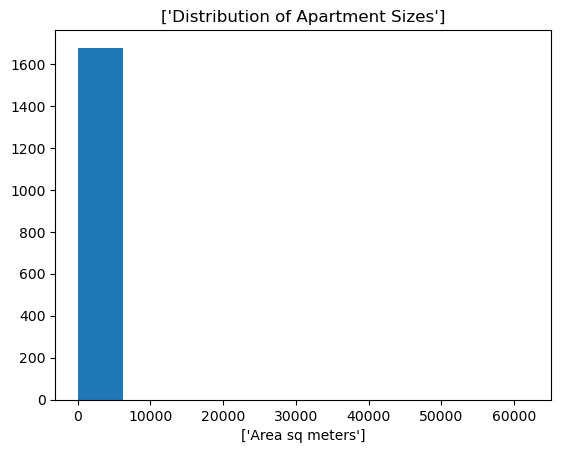

In [15]:
# Create a histogram of `"surface_covered_in_m2"`
plt.hist(df["surface_covered_in_m2"])
plt.xlabel(["Area sq meters"]);
plt.title(["Distribution of Apartment Sizes"]);

When you see a histogram, it suggests that there are outliers in your dataset.  
- To confirm, let's look at the summary statistics for the `"surface_covered_in_m2"` feature. 

In [17]:
df["surface_covered_in_m2"].describe()

count     1678.000000
mean        98.862932
std       1513.324026
min          0.000000
25%         38.000000
50%         51.000000
75%         75.000000
max      62034.000000
Name: surface_covered_in_m2, dtype: float64

In [18]:
df['surface_covered_in_m2'].quantile([0.1,0.95])

0.10     31.00
0.95    133.15
Name: surface_covered_in_m2, dtype: float64

The descriptive statistics confirm what we suspected. 
- While most of the apartments in our dataset are smaller that 75 square meters, 
- there are some that are several thousand square meters, and remove them from the dataset. 

In [19]:
low, high = df["surface_covered_in_m2"].quantile([0.1,0.9])

subarea=df["surface_covered_in_m2"].between(low,high)
df[subarea].head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...


In [20]:
df.shape

(1829, 16)

In [ ]:
df=df[CapFed & apt & priceusd & subarea]
df.shape

Let us create a scatter plot that shows price (`"price_aprox_usd"`) vs area (`"surface_covered_in_m2"`) in our dataset. 

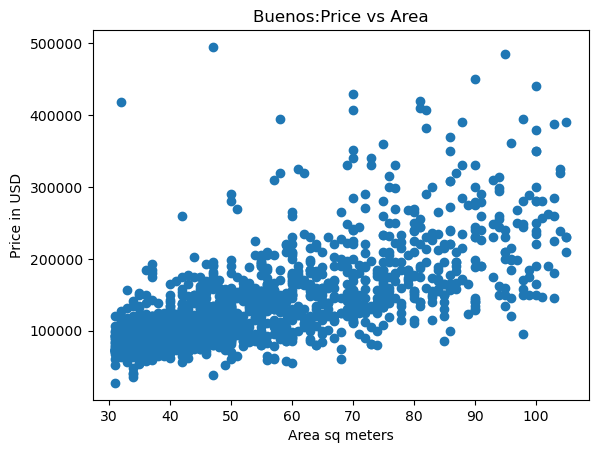

In [22]:
plt.scatter(x=df["surface_covered_in_m2"],y=df["price_aprox_usd"])
plt.xlabel("Area sq meters")
plt.ylabel("Price in USD")
plt.title("Buenos:Price vs Area");

- This plot suggests that there's a moderate positive correlation between apartment price and size. 
    - This means that size(area) will be a good feature to predict price 

Using descriptive statistics;

In [26]:
# Calculate correlation of "price_usd" and "area_m2"
correlation = df["surface_covered_in_m2"].corr(df["price_aprox_usd"])

# Print correlation coefficient
print("Correlation of AREA vs PRICE:Buenos", correlation)

Correlation of AREA vs PRICE:Buenos 0.6732134966190124


#### Split

A key part in any model-building project is separating;
- your **target / dependant variable** - the thing you want to predict, from 
- your **features / independant variable(s)** - the information your model will use to make its predictions. 

In this project:
- Price is the target
- Size is the feature

we are going to predict `price(y)` as a `linear function` of `size(x)`: $y=mx+b$ 

    That is:  price = m*size + b 

**Linear Regression:** 
- It is a statistical method used to model the relationship between `a dependent variable` and `one or more independent variables` by fitting `a linear equation` to the observed data. 
- However, linear regression can handle multiple independent variables, not just one. 
    - When there's only one independent variable, it's called `simple linear regression`. 
    - When there are multiple independent variables, it's called `multiple linear regression`. 

In both cases, the relationship is still linear, but there can be more than one independent variable.

In [27]:
df[["price_aprox_usd","surface_covered_in_m2"]].head()

,price_aprox_usd,surface_covered_in_m2
4,129000.0,70.0
9,87000.0,42.0
29,118000.0,54.0
40,57000.0,42.0
41,90000.0,50.0


**Feature Matrix**

Create the feature matrix named `X_train`, which you'll use to train your model. 
- It should contain one feature only: `["surface_covered_in_m2"]`. 
- Feature matrix should always be two-dimensional. 

In [38]:
feature = ["surface_covered_in_m2"]
X_train = df[feature]
print(X_train.shape)
X_train.head()

(1371, 1)


,surface_covered_in_m2
4,70.0
9,42.0
29,54.0
40,42.0
41,50.0


**Target Vector**

Create the target vector named `y_train`, which you'll use to train your model.
- Here, the target vector is `"price_aprox_usd"`. 
- In most cases, target vector should be one-dimensional. 


In [39]:
target = "price_aprox_usd"
y_train = df[target]
print(y_train.shape)
y_train.head()

(1371,)


4     129000.0
9      87000.0
29    118000.0
40     57000.0
41     90000.0
Name: price_aprox_usd, dtype: float64

### Build Model

**Baseline**

The first step in building a model is baselining. 

- To do this, ask yourself how you will know if the model you build is `performing well`?" 


- A "baseline" serves as a `benchmark` against which the performance of more sophisticated models can be measured. 


- Baseline models are typically simple and easy to implement, often making use of basic statistical methods or rules of thumb.


- Once a baseline has been established, more complex models can be developed and evaluated against it to determine if they offer improvements in terms of accuracy, precision, recall, or other relevant metrics. 


- If the complex model does not significantly outperform the baseline, it may indicate that further optimization or feature engineering is needed.

In this case,we use
- Mean Predictor: For regression tasks, predicting the mean of the target variable for all instances.
    - It predicts the same price regardless of an apartment's size.  

In [40]:
df[["price_aprox_usd","surface_covered_in_m2"]].describe()

,price_aprox_usd,surface_covered_in_m2
count,1371.000000,1371.000000
mean,139268.305908,55.851933
std,66132.001187,18.938489
min,27279.000000,31.000000
25%,92000.000000,40.000000
50%,123000.000000,50.000000
75%,165000.000000,70.000000
max,495000.000000,105.000000


Calculate the `mean` of your target vector `y_train` 

In [41]:
y_mean = y_train.mean()
y_mean

139268.30590809626

Now that we have the one prediction that our baseline model will always make, we need to generate a list that repeats the prediction for every observation in our dataset. 

Create a list named `y_pred_baseline` that contains the value of `y_mean` repeated so that it's the same length at `y`.


In [42]:
y_pred_baseline = [y_mean]*len(y_train)
len(y_pred_baseline)

1371

So how does our baseline model perform? One way to evaluate it is by plotting it on top of the scatter plot we made above. 

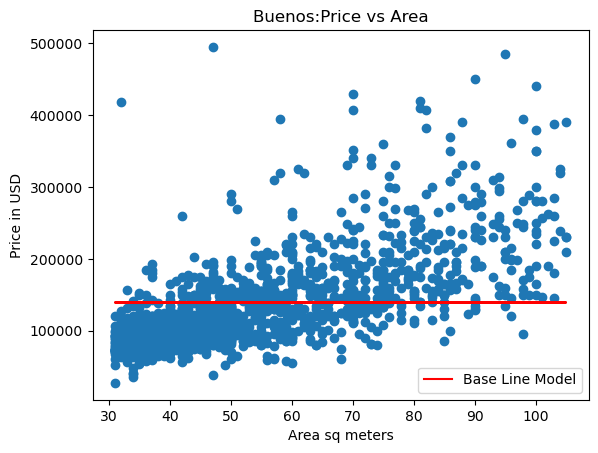

In [43]:
plt.plot(X_train.values, y_pred_baseline,color="red",label="Base Line Model")
plt.scatter(X_train, y_train)
plt.xlabel("Area sq meters")
plt.ylabel("Price in USD")
plt.title("Buenos:Price vs Area")
plt.legend();

- It seems like our baseline model doesn't really follow the trend in the data. 
- But, as a data scientist, you can't depend only on a subjective plot to evaluate a model. 
- You need an exact, mathematically calculate **performance metric**. There are lots of performance metrics, but the one we'll use here is the **mean absolute error**.  

Mathematically, an *error* is the difference between a `approximate` and `exact`. 

That is: Error = |Exact - approximate|

- `Absolute Error` is the error in a single measurement
- `Mean Absolute Error(MAE)` is the average error over the course of several measurements

Calculate the baseline mean absolute error for your predictions in `y_pred_baseline` as compared to the true targets in `y`.

In [47]:
mae_baseline = mean_absolute_error(y_train,y_pred_baseline)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 139268.31
Baseline MAE: 48756.9


What does this information tell us? 
- If we always predicted that an apartment price is \\$139,268.31, our predictions would be off by an average of \\$48,756.90.
- It also tells us that our model needs to have mean absolute error below \\$48,756.90 in order to be useful. 

**Iterate**

The next step in building a model is iterating. 
- This involves building a `model`, `training` it, `evaluating` it, and then repeating the process until you're happy with the model's performance. 

The first thing we need to do is create our model — in this case, one that uses linear regression.

Instantiate a [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [48]:
ourmodel = LinearRegression()

The second thing we need to do is use our data to train our model. 
- Another way to say this is fit our model to the training data. 

Fit your model to the data, `X_train` and `y_train`.

In [49]:
ourmodel.fit(X_train,y_train)

LinearRegression()

**Evalaute**

The final step is to evaluate our model. 
- In order to do that, we'll start by seeing how well it performs when making predictions for data that it saw during training. 

So let's have it predict the price for the houses in our training set.

Using your model's [`predict`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict) method, create a list of predictions for the observations in your feature matrix `X_train`. 

In [50]:
y_pred_training = ourmodel.predict(X_train)
y_pred_training[:5]

array([172527.84714326, 106704.92251907, 134914.74735801, 106704.92251907,
       125511.47241169])

Now that we have predictions, we'll use them to assess our model's performance with the training data. We'll use the same metric we used to evaluate our baseline model: mean absolute error. 

Calculate your training mean absolute error for your predictions in `y_pred_training` as compared to the true targets in `y_train`.

In [51]:
mae_training = mean_absolute_error(y_train,y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 33402.03


Our model beat the baseline by over \$15,000! That's a good indicator that it will be helpful in predicting apartment prices. 

### Communicate Results

Once your model is built and tested, it's time to share it with others. 
- If you're presenting to simple linear model to a technical audience, they might appreciate an equation. 

When we created our baseline model, we represented it as a line. The equation for a line like this is usually written as: $y = m*x + b$

Since data scientists often work with more complicated linear models, they prefer to write the equation as:

$y = \beta_0 + \beta_1x$,

where $\beta_0=b=intercept$  and  $\beta_1=m=slope$

Regardless of how we write the equation, 
- we need to find the values that our model has determined for the `intercept` and `coefficient`. 

Fortunately, all trained models in scikit-learn store this information in the model itself. 

Extract the intercept from your model, and assign it to the variable `intercept`. 

In [71]:
b = ourmodel.intercept_
print("Model Intercept:", b)

Model Intercept: 7970.53558278564


In a very similar way, extrcat the coefficient (slope)

In [52]:
m = ourmodel.coef_[0]
print('Model coefficient for "surface_covered_in_m2":', m)

Model coefficient for "surface_covered_in_m2": 2350.8187365781782


Now that we have our `intercept` and `coefficient`, we need to insert them into a string that we can print out the complete equation.

Complete the code below and run the cell to print the equation that your model has determined for predicting apartment price based on size.

In [ ]:
print(f"Price={b}+{m}*Area")

Equation might work for some technical audiences, 
- but visualization or generally much more effective communication tool — especially for non-technical audiences. 

So let's use the scatter plot we made at the beginning of this lesson and plot the line that that are equation would make.

Add a line to the plot below that shows the relationship between the observations in `X_train` and your model's predictions `y_pred_training`. Be sure that the line color is red, and that it has the label `"Linear Model"`.

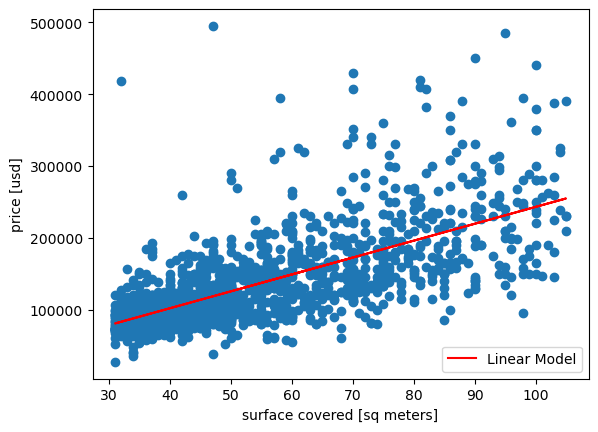

In [54]:
plt.plot(X_train,ourmodel.predict(X_train),color="red",label="Linear Model")
plt.scatter(X_train, y_train)
plt.xlabel("surface covered [sq meters]")
plt.ylabel("price [usd]")
plt.legend();